# Mini project 1: air quality in U.S. cities
### Amy Nguyen

In a way, this project is simple: you are given some data on air quality in U.S. metropolitan areas over time together with several questions of interest, and your objective is to answer the questions.

However, unlike the homeworks and labs, there is no explicit instruction provided about *how* to answer the questions or where exactly to begin. Thus, you will need to discern for yourself how to manipulate and summarize the data in order to answer the questions of interest, and you will need to write your own codes from scratch to obtain results. It is recommended that you examine the data, consider the questions, and plan a rough approach before you begin doing any computations.

You have some latitude for creativity: **although there are accurate answers to each question** -- namely, those that are consistent with the data -- **there is no singularly correct answer**. Most students will perform similar operations and obtain similar answers, but there's no specific result that must be considered to answer the questions accurately. As a result, your approaches and answers may differ from those of your classmates. If you choose to discuss your work with others, you may even find that disagreements prove to be fertile learning opportunities.

The questions can be answered using computing skills taught in class so far and basic internet searches for domain background; for this project, you may wish to refer to HW1 and Lab1 for code examples and the [EPA website on PM pollution](https://www.epa.gov/pm-pollution) for background. However, you are also encouraged to refer to external resources (package documentation, vignettes, stackexchange, internet searches, etc.) as needed -- this may be an especially good idea if you find yourself thinking, 'it would be really handy to do X, but I haven't seen that in class anywhere'.

The broader goal of these mini projects is to cultivate your problem-solving ability in an unstructured setting. Your work will be evaluated based on the following:
- choice of method(s) used to answer questions;
- clarity of presentation;
- code style and documentation.

Please write up your results separately from your codes; codes should be included at the end of the notebook.

---


## Part I: Dataset

Merge the city information with the air quality data and tidy the dataset (see notes below). Write a brief description of the data.

In your description, answer the following questions:

- What is a CBSA (the geographic unit of measurement)?
- How many CBSA's are included in the data?
- In how many states and territories do the CBSA's reside? (*Hint: `str.split()`*)
- In which years were data values recorded?
- How many observations are recorded?
- How many variables are measured?
- Which variables are non-missing most of the time (*i.e.*, in at least 50% of instances)?
- What is PM 2.5 and why is it important?

Please write your description in narrative fashion; _**please do not list answers to the questions above one by one**_. A few brief paragraphs should suffice; please limit your data description to three paragraphs or less.

### Air quality data

A CBSA (Core Based Statistical Area) is a geographic area, either a city or multiple adjacent cities in the U.S. and select territories. Within the dataset, there are 351 CBSA's which reside in 86 states and territories. The recorded data ranged from 2000-2019. From the original dataset after merging, there were 1134 recorded observations, however after cleaning up the data, and reorganizing the dataframe, there were actually 7020 total observations and 13 variables, 8 of which were trend statistics of recorded air pollutants. Namely, 'CO 2nd Max', `PM10 2nd Max`, `O3 4th Max`, `NO2 4th Max`, `PM2.5 98th Percentile`, `SO2 99th Percentile`, `NO2 Annual Mean`, `Pb`, and `PM2.5 Weighted Annual Mean`. A single observation in the dataframe represents an annual record of a CBSA's air quality report between 2000 and 2019, and while many of the measured pollutants had a sizeable proportion of missingness, `4th Max O3`, `PM2.5 98th Percentile`, and `PM2.5 Weighted Annual Mean` were only missing 19.0883%, 39.0313%, 39.0313% of the time. 

PM 2.5 is particulate matter (also known as particle pollution) with diameters that are generally 2.5 micrometers and smaller. Due to its minuscule size, PM 2.5 is inhalable and poses serious health risks. This dataframe displays crucial information on the air quality in cities all over the U.S. and can be used to evaluate whether or not these cities compliant with EPA standards.

## Part II: Descriptive analysis

Focus on the PM2.5 measurements that are non-missing most of the time. Answer each of the following questions in a brief paragraph or two. Your paragraph(s) should indicate both your answer and a description of how you obtained it; _**please do not include codes with your answers**_.

### Has PM 2.5 air pollution improved in the U.S. on the whole since 2000?

I used `seaborn` to create a barplot displaying the PM 2.5 Weighted Annual Mean for all recorded CBSA's for each year. The plot clearly displays an overall decrease in PM 2.5 air pollution in the U.S. between 2000 and 2019. This is also be demonstrated after grouping by year and finding the overall average PM 2.5 Weighted Annual Mean for each year. As time progresses, the PM 2.5 Weighted Annual Mean across all recorded CBSA's in the U.S. has significantly improved from an average PM2.5 weighted annual mean of 13.058$\mu g/m^3$ in 2000 to 7.559$\mu g/m^3$ in 2019.

### Over time, has PM 2.5 pollution become more variable, less variable, or about equally variable from city to city in the U.S.?

Over time, PM 2.5 Pollution has become less variable from city to city in the U.S. After grouping by `Year` and calculating the variance of the PM 2.5 Weighted Annual Mean, we see that the overall variance in 2000 was 12.141 while the variance in 2019 decreased to 2.595. Using `seasborn` to plot the variability of PM 2.5 pollution from 2000 to 2019, there is a spike in 2004 and 2005 but continues to decrease as time progresses.

### Which state has seen the greatest improvement in PM 2.5 pollution over time? Which city has seen the greatest improvement?

I defined 'greatest improvement' as the CBSA seeing the largest decrease in PM 2.5 Weighted Annual Mean between 2000 and 2019. I created two new dataframes, `old` and `new`, which extracted the CBSA, city, state, and PM 2.5 Weighted Annual Mean (abbreviated WAM) in 2000 and 2019, respectively. `old` and `new` were then merged into a new dataframe `improvement`, and a new column `Difference` computed the difference in PM 2.5 WAM for each CBSA (2000 - 2019).

The results show that Portsmouth, Ohio had the greatest weighted annual mean decrease in PM 2.5 between 2000 and 2019. In 2000, Portsmouth had a PM 2.5 WAM of 21.1$\mu g/m^3$ and in 2019, the PM 2.5 WAM was 6.7$\mu g/m^3$ for an impressive 14.4$\mu g/m^3$ decrease in PM 2.5. The runner up was Gadsden, Alabama with a decrease of 11.2 $\mu g/m^3$ PM 2.5 WAM. However, Hawaii has consistently had the lower PM 2.5 concentration levels, achieving both the lowest average 98th percentile of PM 2.5 **and** the lowest average annual mean of 4.65$\mu g/m^3$ between 2000 and 2019.

### Choose a location with some meaning to you (e.g. hometown, family lives there, took a vacation there, etc.). Was that location in compliance with EPA primary standards as of the most recent measurement?

Coming from the Bay Area, I filtered the dataframe to search up the recorded data for 'San Francisco'. At first, there was no recorded data solely for San Francisco, and I figured it must exist being one of the biggest cities in the U.S. Taking a closer look at the raw .csv files, and filtering using San Francisco as a substring, I found it was recorded alongside Oakland and Hayward under the city name 'San Francisco-Oakland-Hayward'. 

For 2019, San Francisco's weighted annual mean for PM 2.5 was 7.0$\mu g/m^3$ while the EPA primary standard is 12.0$\mu g/m^3$. Additionally, San Francisco's 98th percentile of the daily average measurements for PM 2.5 was 17.0$\mu g/m^3$ in 2019, while the EPA's standard is 35$\mu g/m^3$. Thus, San Francisco is compliant with current EPA primary standards.

## Extra credit: Imputation

One strategy for filling in missing values ('imputation') is to use non-missing values to predict the missing ones; the success of this strategy depends in part on the strength of relationship between the variable(s) used as predictors of missing values. 

Identify one other pollutant that might be a good candidate for imputation based on the PM 2.5 measurements and explain why you selected the variable you did. Can you envision any potential pitfalls to this technique?

---

# Codes

In [1]:
# packages
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

# raw data
air_raw = pd.read_csv('air-quality.csv')
cbsa_info = pd.read_csv('cbsa-info.csv')

## PART I

merged_data = pd.merge(cbsa_info, air_raw, how = 'left', on = 'CBSA')

# made copy and dropped Number of Trends Sites
data1 = merged_data.copy().drop(columns=['Number of Trends Sites'])

# split 'Core Based Statistical Area' into 'City' and 'State' columns 
split = data1['Core Based Statistical Area'].str.split(r", ", expand = True
).rename(
    columns = {0: 'City', 1: 'State'}
)

# melt years to 'Year' and pivot 'Pollutants' and 'Trend Statistic'
data2 = split.join(data1).drop(columns = ['Core Based Statistical Area']).melt(
    id_vars = ['CBSA', 'City', 'State', 'Pollutant', 'Trend Statistic'],
    var_name = 'Year'
).pivot_table(
    index = ['CBSA', 'City', 'State', 'Year'],
    columns = ['Trend Statistic','Pollutant'],
    values = 'value'
)

data2.head()

Trend Statistic           2nd Max       4th Max 98th Percentile        \
Pollutant                      CO  PM10      O3             NO2 PM2.5   
CBSA  City     State Year                                               
10100 Aberdeen SD    2000     NaN  50.0     NaN             NaN  23.0   
                     2001     NaN  58.0     NaN             NaN  23.0   
                     2002     NaN  59.0     NaN             NaN  20.0   
                     2003     NaN  66.0     NaN             NaN  21.0   
                     2004     NaN  39.0     NaN             NaN  23.0   

Trend Statistic           99th Percentile Annual Mean Max 3-Month Average  \
Pollutant                             SO2         NO2                  Pb   
CBSA  City     State Year                                                   
10100 Aberdeen SD    2000             NaN         NaN                 NaN   
                     2001             NaN         NaN                 NaN   
                     2002             NaN         NaN                 NaN   
                     2003             NaN         NaN                 NaN   
                     2004             NaN         NaN                 NaN   

Trend Statistic           Weighted Annual Mean  
Pollutant                                PM2.5  
CBSA  City     State Year                       
10100 Aberdeen SD    2000                  8.6  
                     2001                  8.6  
                     2002                  7.9  
                     2003                  8.4  
                     2004                  8.1

Because `data2` has multi-level columns, I found it difficult to subset and graph, so I dropped one of the levels and renamed the columns into a new dataframe `data3`.

In [2]:
data3 = data2.droplevel(
    0, axis = 1
).reset_index().rename_axis(columns=None)

data3.columns = ['CBSA', 'City', 'State', 'Year',
                 'CO 2nd Max', 'PM10 2nd Max', 
                 'O3 4th Max', 'NO2 4th Max', 
                 'PM2.5 98th Percentile', 'SO2 99th Percentile', 
                 'NO2 Annual Mean', 'Pb', 
                 'PM2.5 Weighted Annual Mean']
data3.head()

,CBSA,City,State,Year,CO 2nd Max,PM10 2nd Max,O3 4th Max,NO2 4th Max,PM2.5 98th Percentile,SO2 99th Percentile,NO2 Annual Mean,Pb,PM2.5 Weighted Annual Mean
0,10100,Aberdeen,SD,2000,NaN,50.0,NaN,NaN,23.0,NaN,NaN,NaN,8.6
1,10100,Aberdeen,SD,2001,NaN,58.0,NaN,NaN,23.0,NaN,NaN,NaN,8.6
2,10100,Aberdeen,SD,2002,NaN,59.0,NaN,NaN,20.0,NaN,NaN,NaN,7.9
3,10100,Aberdeen,SD,2003,NaN,66.0,NaN,NaN,21.0,NaN,NaN,NaN,8.4
4,10100,Aberdeen,SD,2004,NaN,39.0,NaN,NaN,23.0,NaN,NaN,NaN,8.1


In [3]:
merged_data.shape

(1134, 25)

In [4]:
data3.shape

(7020, 13)

In [5]:
# number of states and territories where CBSAs reside 
data3.State.unique().size

86

In [6]:
# proportion of missingness
data3.isna().mean()

CBSA                          0.000000
City                          0.000000
State                         0.000000
Year                          0.000000
CO 2nd Max                    0.831909
PM10 2nd Max                  0.706553
O3 4th Max                    0.190883
NO2 4th Max                   0.809117
PM2.5 98th Percentile         0.390313
SO2 99th Percentile           0.746439
NO2 Annual Mean               0.746439
Pb                            0.957265
PM2.5 Weighted Annual Mean    0.390313
dtype: float64

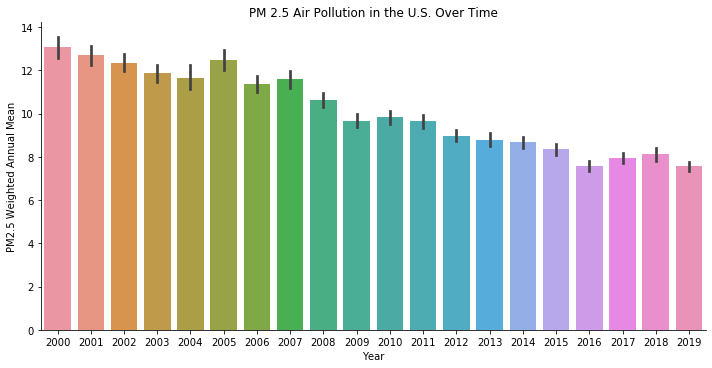

In [7]:
## PART 2

# visualizing PM2.5 air pollution trend over time

sns.catplot(
    data = data3, 
    x = 'Year', 
    y = 'PM2.5 Weighted Annual Mean', 
    kind = 'bar', 
    aspect = 2/1
).set(
    title = 'PM 2.5 Air Pollution in the U.S. Over Time'
)

In [8]:
data3.drop(columns = ['CBSA']).groupby('Year').mean()

,CO 2nd Max,PM10 2nd Max,O3 4th Max,NO2 4th Max,PM2.5 98th Percentile,SO2 99th Percentile,NO2 Annual Mean,Pb,PM2.5 Weighted Annual Mean
Year,,,,,,,,,
2000,3.310169,85.745631,0.079849,55.731343,34.130841,78.168539,14.393258,0.342000,13.057944
2001,3.072881,96.267961,0.080676,55.164179,34.387850,79.224719,14.337079,0.400667,12.688318
2002,2.801695,83.975728,0.084433,53.701493,33.397196,72.921348,13.955056,0.256667,12.352336
2003,2.588136,88.920388,0.079331,52.194030,29.799065,74.337079,13.483146,0.268000,11.853271
2004,2.416949,75.337864,0.072570,49.626866,31.962617,72.337079,12.640449,0.469333,11.642056
2005,2.169492,72.496117,0.077553,49.746269,33.794393,72.393258,12.674157,0.272667,12.479439
2006,2.150847,76.801942,0.075451,48.611940,29.116822,70.022472,12.044944,0.220000,11.360748
2007,1.866102,66.819417,0.076373,47.313433,30.859813,65.314607,11.674157,0.270667,11.573364
2008,1.750847,66.979612,0.071704,46.955224,27.373832,55.831461,10.853933,0.370000,10.625234


In [9]:
variability = data3.groupby('Year')['PM2.5 Weighted Annual Mean'].var().dropna()
variability

Year
2000    12.140758
2001    10.520849
2002    10.419126
2003     8.687290
2004    15.455406
2005    12.588871
2006     7.537044
2007     9.238020
2008     6.172130
2009     4.949204
2010     5.762313
2011     4.790074
2012     3.214452
2013     4.636477
2014     3.993663
2015     3.444991
2016     2.848132
2017     3.436453
2018     5.274738
2019     2.594528
Name: PM2.5 Weighted Annual Mean, dtype: float64

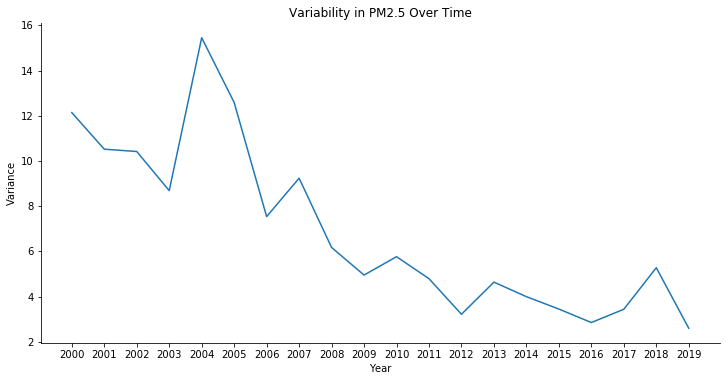

In [10]:
sns.relplot(
    data = variability, 
    kind = 'line', 
    aspect = 2/1
).set(
    xlabel = 'Year',
    ylabel = 'Variance',
    title = 'Variability in PM2.5 Over Time'
)


In [11]:
# finding which city/state had a greater improvement in PM 2.5 pollution

old = data3[(data3.Year == '2000')].drop(
    columns = ['CO 2nd Max', 'PM10 2nd Max', 
    'O3 4th Max', 'NO2 4th Max', 
    'PM2.5 98th Percentile', 'SO2 99th Percentile', 
    'NO2 Annual Mean', 'Pb', 'Year']
).rename(
    columns = {'PM2.5 Weighted Annual Mean':'PM 2.5 WAM (2000)'}
)

new = data3[(data3.Year == '2019')].drop(
    columns = ['CO 2nd Max', 'PM10 2nd Max', 
    'O3 4th Max', 'NO2 4th Max', 
    'PM2.5 98th Percentile', 'SO2 99th Percentile', 
    'NO2 Annual Mean', 'Pb', 'Year']
).rename(
    columns = {'PM2.5 Weighted Annual Mean':'PM 2.5 WAM (2019)'}
)

improvement = pd.merge(old, new, on=['CBSA','City', 'State'], how = 'left')
improvement['Difference'] = improvement['PM 2.5 WAM (2019)'] - improvement['PM 2.5 WAM (2000)']
improvement.sort_values(by='Difference').head()

,CBSA,City,State,PM 2.5 WAM (2000),PM 2.5 WAM (2019),Difference
242,39020,Portsmouth,OH,21.1,6.7,-14.4
113,23460,Gadsden,AL,19.5,8.3,-11.2
196,33700,Modesto,CA,18.7,7.7,-11.0
327,47300,Visalia-Porterville,CA,23.9,12.9,-11.0
33,13820,Birmingham-Hoover,AL,20.0,9.2,-10.8


In [12]:
annual_mean = data3.drop(columns = ['CBSA', 'Year']
).groupby(
    'State'
).mean().sort_values(
    by = 'PM2.5 Weighted Annual Mean'
)
annual_mean.head()

,CO 2nd Max,PM10 2nd Max,O3 4th Max,NO2 4th Max,PM2.5 98th Percentile,SO2 99th Percentile,NO2 Annual Mean,Pb,PM2.5 Weighted Annual Mean
State,,,,,,,,,
HI,1.100,45.2000,0.044650,25.30,11.275,10.650000,4.15,NaN,4.6300
ND,NaN,NaN,0.059175,NaN,14.850,46.066667,2.00,NaN,5.2725
NV,2.980,77.4875,0.071525,NaN,19.400,NaN,17.30,NaN,6.0050
NM,1.645,102.5975,0.069850,45.25,15.775,NaN,8.30,NaN,6.0775
SD,NaN,47.8750,NaN,NaN,19.525,NaN,NaN,NaN,6.9775


In [13]:
data3[(data3['City'].str.contains('San Francisco')) & (data3['Year'] == '2019')]

,CBSA,City,State,Year,CO 2nd Max,PM10 2nd Max,O3 4th Max,NO2 4th Max,PM2.5 98th Percentile,SO2 99th Percentile,NO2 Annual Mean,Pb,PM2.5 Weighted Annual Mean
5479,41860,San Francisco-Oakland-Hayward,CA,2019,1.1,37.0,0.062,37.0,17.0,10.0,8.0,NaN,7.0


---
## Notes on merging (keep at bottom of notebook)

To combine datasets based on shared information, you can use the `pd.merge(A, B, how = ..., on = SHARED_COLS)` function, which will match the rows of `A` and `B` based on the shared columns `SHARED_COLS`. If `how = 'left'`, then only rows in `A` will be retained in the output (so `B` will be merged *to* `A`); conversely, if `how = 'right'`, then only rows in `B` will be retained in the output (so `A` will be merged *to* `B`).

A simple example of the use of `pd.merge` is illustrated below:

In [14]:
# toy data frames
A = pd.DataFrame(
    {'shared_col': ['a', 'b', 'c'], 
    'x1': [1, 2, 3], 
    'x2': [4, 5, 6]}
)

B = pd.DataFrame(
    {'shared_col': ['a', 'b'], 
    'y1': [7, 8]}
)

In [15]:
A

,shared_col,x1,x2
0,a,1,4
1,b,2,5
2,c,3,6


In [16]:
B

,shared_col,y1
0,a,7
1,b,8


Below, if `A` and `B` are merged retaining the rows in `A`, notice that a missing value is input because `B` has no row where the shared column (on which the merging is done) has value `c`. In other words, the third row of `A` has no match in `B`.

In [17]:
# left join
pd.merge(A, B, how = 'left', on = 'shared_col')

,shared_col,x1,x2,y1
0,a,1,4,7.0
1,b,2,5,8.0
2,c,3,6,NaN


If the direction of merging is reversed, and the row structure of `B` is dominant, then the third row of `A` is dropped altogether because it has no match in `B`.

In [18]:
# right join
pd.merge(A, B, how = 'right', on = 'shared_col')

,shared_col,x1,x2,y1
0,a,1,4,7
1,b,2,5,8
